## Table of Contents

2. <a href='#clean'>Clean Data, Lemmatize, POS Functions</a>


3. <a href='#sentiment'>Sentiment Analysis and Dynamic Time Warping Example w/ Sentiment Matrix</a>

    3.1. <a href='#sentiment2'>Sentiment Matrix</a>
    

4. <a href='#nmf'>NMF Topic Modeling w/ Cosine Similarity</a>

    4.1. <a href='#weights'>Get Weights for Model</a>
    
    4.2. <a href='#cosine'>Cosine Similarity Scores</a>
    

5. <a href='#recommendation'>Recommendation System: Sentiment and Cosine Similarity Matrix</a>


6. <a href='#word2vec'>Word2Vec and PCA</a>


## Clean Data, Lemmatize, POS Functions
<a id='clean'></a>

In [5]:
import pandas as pd
import numpy as np
import string
import re
import pickle
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

lemmatizer = WordNetLemmatizer()

In [6]:
#function used to clean the story/script before sentiment analysis and dynamic time warping techniques
def clean3(story):
    story = open(story, "r")
    regex = re.compile('[%s]' % re.escape('"#$%&\()*+-/:;<=>@[\\]^_`{|}~'))
    out = regex.sub(' ', story.read())
    out = out.replace('\n',' ')
    out = out.replace('\x0c', '')
    out = out.replace('\t', '')
    return out

In [7]:
#function used to clean the story/script before topic modeling
def clean(story):
    story = open(story, "r")
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    out = regex.sub(' ', story.read())
    out = out.replace('’', '')
    out = out.replace('—', '')
    out = out.replace('‘', '')
    out = out.replace('\n',' ')
    out = out.replace('\x0c', ' ')
    out = out.lower()
    out = out.replace('\t', ' ')
    out = re.sub("\d+", "", out)
    out = out.replace('”', '')
    out = out.replace ('“', '')
    return out

In [9]:
#function used to do parts of speech tagging, keeping only nouns and adjectives. 
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                #"V": wordnet.VERB,
                #"R": wordnet.ADV}
               }

    return tag_dict.get(tag, wordnet.NOUN)

In [10]:
#function to lemmatize text.
def lem(txtfile):
    d = clean(txtfile)
    d_ = ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in d.split()])
    return d_

## Sentiment Analysis and Dynamic Time Warping Example w/ Sentiment Matrix
<a id='sentiment'></a>

In [11]:
import nltk
import pickle
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import tokenize
import matplotlib.pyplot as plt
%matplotlib inline
sid = SentimentIntensityAnalyzer()
from tslearn.metrics import dtw_path 
import pandas as pd

In [12]:
#function to give sentiment scores to each line/sentence of the script/story
def sent_df(pklfile):
    with open(pklfile, 'rb') as pkl:
        a = pickle.load(pkl)
    a = tokenize.sent_tokenize(a)
    df = pd.DataFrame()
    df['sentence'] = [sentence for sentence in a]
    df['sentiment'] = [sid.polarity_scores(sentence)['compound'] for sentence in a]
    a_ = df['sentiment']
    print(str(pklfile), len(a))
    return a_

In [13]:
#function to get the dynamic time warping distance
#compares two text file's sentiment similarity over time.
def dist(df1, df2):
    path, dist = dtw_path(df1, df2)
    print(len(df1), len(df2), len(df1)-len(df2))
    return dist

hunchback3.pkl 8665
hunchback3.pkl 8665
hunchback_script3.pkl 1134
hunchback_script3.pkl 1134


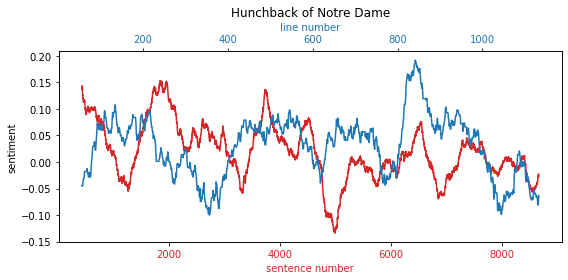

In [14]:
#an example comparing Hunchback of Notre Dame movie and story

fig, ax1 = plt.subplots(figsize = (8,4))
ax1.title.set_text('Hunchback of Notre Dame')


color = 'tab:red'
ax1.set_xlabel('sentence number', color = color)
ax1.set_ylabel('sentiment')
ax1.plot(range(8665), sent_df('hunchback3.pkl').rolling(len(sent_df('hunchback3.pkl'))//20).mean(), color=color)
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twiny()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_xlabel('line number', color = color)
#ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1134), sent_df('hunchback_script3.pkl').rolling(len(sent_df('hunchback_script3.pkl'))//20).mean(), color=color)
ax2.tick_params(axis='x', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [5]:
# dynamic time warping distance of the Hunback of Notre Dame movie and story
dist(sent_df('hunchback3.pkl'), sent_df('hunchback_script3.pkl'))

hunchback3.pkl 8665
hunchback_script3.pkl 1134
8665 1134 7531


33.087641731317106

### Sentiment Matrix
<a id='sentiment2'></a>

In [21]:
def df(list_of_pickle_files):
    all_df = pd.DataFrame()
    for pickle_file in list_of_pickle_files:
        with open(pickle_file, 'rb') as pkl:
            a = pickle.load(pkl)
        a = tokenize.sent_tokenize(a)
        df = pd.DataFrame()
        df[str(pickle_file)] = [sid.polarity_scores(sentence)['compound'] for sentence in a]
        all_df = pd.concat([all_df, df], axis=1)
    return all_df

In [22]:
df = df(['alice3.pkl', 'mulan3.pkl', 'aladdin3.pkl', 'dalmations3.pkl', 'bambi3.pkl', 'beauty3.pkl', 
        'cinderella3.pkl', 'hunchback3.pkl', 'little_mermaid3.pkl', 'peter_pan3.pkl', 'pinocchio3.pkl',
        'rapunzel3.pkl', 'robin_hood3.pkl', 'sleeping_beauty3.pkl', 'snow_white3.pkl', 'tarzan3.pkl', 'winnie_the_pooh3.pkl',
        'alice_script3.pkl', 'mulan_script3.pkl', 'aladdin_script3.pkl', '101dalmations_script3.pkl', 'bambi_script3.pkl',
        'beauty_script3.pkl', 'cinderella_disney3.pkl', 'hunchback_script3.pkl', 'little_mermaid_script3.pkl', 'peter_pan_script3.pkl',
        'pinocchio_script3.pkl', 'rapunzel_disney3.pkl', 'robin_hood_script3.pkl', 'sleeping_beauty_disney3.pkl', 'snow_white_disney3.pkl',
        'tarzan_script3.pkl', 'winnie_the_pooh_script3.pkl'])

In [23]:
def dist(df1, df2):
    path, dist = dtw_path(df1, df2)
    return dist

In [24]:
name_list = ['alice3.pkl', 'mulan3.pkl', 'aladdin3.pkl', 'dalmations3.pkl', 'bambi3.pkl', 'beauty3.pkl', 
        'cinderella3.pkl', 'hunchback3.pkl', 'little_mermaid3.pkl', 'peter_pan3.pkl', 'pinocchio3.pkl',
        'rapunzel3.pkl', 'robin_hood3.pkl', 'sleeping_beauty3.pkl', 'snow_white3.pkl', 'tarzan3.pkl', 'winnie_the_pooh3.pkl',
        'alice_script3.pkl', 'mulan_script3.pkl', 'aladdin_script3.pkl', '101dalmations_script3.pkl', 'bambi_script3.pkl',
        'beauty_script3.pkl', 'cinderella_disney3.pkl', 'hunchback_script3.pkl', 'little_mermaid_script3.pkl', 'peter_pan_script3.pkl',
        'pinocchio_script3.pkl', 'rapunzel_disney3.pkl', 'robin_hood_script3.pkl', 'sleeping_beauty_disney3.pkl', 'snow_white_disney3.pkl',
        'tarzan_script3.pkl', 'winnie_the_pooh_script3.pkl']

#matrix of dynamic time warping distances among two texts
distances = np.zeros(shape=(len(name_list), len(name_list)))
for i in range(len(name_list)):
    for j in range(i):
        distances[i, j] = dist(df[name_list[i]], df[name_list[j]])

#save sentiment matrix to pkl file
with open('sentiment_matrix.pkl', 'wb') as pkl:
    pickle.dump(distances, pkl)

KeyboardInterrupt: 

## NMF Topic Modeling w/ Cosine Similarity
<a id='nmf'></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 
import nltk

In [ ]:
#function to tokenize on the word level and keep only nouns and adjectives in text
def acceptable(string):
    tokens = nltk.word_tokenize(string)
    tagged = nltk.pos_tag(tokens)
    acceptable_words = []
    for element in tagged:
        if element[1] == 'JJ':
            acceptable_words.append(element[0]) 
        elif element[1] == 'FW':
            acceptable_words.append(element[0])
        elif element[1] == 'NN':
            acceptable_words.append(element[0])
    return acceptable_words

In [ ]:
#function to create a corpus of text of all scripts and movies and divide
#them each into 100 chunks.
def topics(list_of_pklfiles):
    corpus = []
    for pklfile in list_of_pklfiles:
        with open(pklfile, 'rb') as pkl:
            p = pickle.load(pkl)
        aw = acceptable(p)
        for n in range (0,100):
            chunks = ' '.join(aw[n: (n+1)*len(aw)//100])
            corpus.append(chunks)
    df=pd.DataFrame(corpus, columns= ['text'])
    return df

In [ ]:
book = topics(['alice_lem.pkl', 'mulan_lem.pkl', 'aladdin_lem.pkl', 'dalmations_lem.pkl', 'bambi_lem.pkl', 'beauty_lem.pkl', 
        'cinderella_lem.pkl', 'hunchback_lem.pkl', 'little_mermaid_lem.pkl', 'peter_pan_lem.pkl', 'pinocchio_lem.pkl',
        'rapunzel_lem.pkl', 'robin_hood_lem.pkl', 'sleeping_beauty_lem.pkl', 'snow_white_lem.pkl', 'tarzan_lem.pkl', 'winnie_the_pooh_lem.pkl'])

In [ ]:
#instantiate TfidfVectorizer and exclude all english stop words.

vectorizer = TfidfVectorizer(stop_words = 'english')
doc_word = vectorizer.fit_transform(book.text)

In [ ]:
#get 34 topics from the corpus
nmf_model = NMF(34)
doc_topic = nmf_model.fit_transform(doc_word)

In [ ]:
#display the top 15 topics for each topic
display_topics(nmf_model, vectorizer.get_feature_names(), 15)

### Get weights for NMF Model
<a id='weights'></a>

In [ ]:
#create dataframe with rows as the 3400 pieces of segmented books/scripts 
#columns as the topic weights
Vt = pd.DataFrame(doc_topic.round(5),
             index = book,
             columns = ["topic0","topic1", "topic2", "topic3", "topic4",
                        "topic5", "topic6", "topic7", "topic8", "topic9",
                        "topic10", "topic11", "topic12", "topic13", 
                        "topic14", "topic15", "topic16", "topic17", "topic18", "topic19",
                        "topic20", "topic21", "topic22", "topic23", "topic24", "topic25",
                        "topic26", "topic27", "topic28", "topic29", "topic30", "topic31",
                        "topic32", "topic33"])


In [ ]:
#aggregate each of the 100 chunks back to their original script/story and 
#find the average of the weights

import numpy as np

series_list = []
for i in range(0,34):
    series = np.mean(Vt.iloc[i:(i+1)*100])
    series_list.append(series)
series_list

In [ ]:
#new dataframe with aggregated weights of topics of original scripts/stories
df_weights = pd.DataFrame.from_records(series_list)

### Cosine Similarity Scores
<a id='cosine'></a>

In [ ]:
''' name_list = ['alice3.pkl', 'mulan3.pkl', 'aladdin3.pkl', 'dalmations3.pkl', 'bambi3.pkl', 'beauty3.pkl', 
        'cinderella3.pkl', 'hunchback3.pkl', 'little_mermaid3.pkl', 'peter_pan3.pkl', 'pinocchio3.pkl',
        'rapunzel3.pkl', 'robin_hood3.pkl', 'sleeping_beauty3.pkl', 'snow_white3.pkl', 'tarzan3.pkl', 'winnie_the_pooh3.pkl',
        'alice_script3.pkl', 'mulan_script3.pkl', 'aladdin_script3.pkl', '101dalmations_script3.pkl', 'bambi_script3.pkl',
        'beauty_script3.pkl', 'cinderella_disney3.pkl', 'hunchback_script3.pkl', 'little_mermaid_script3.pkl', 'peter_pan_script3.pkl',
        'pinocchio_script3.pkl', 'rapunzel_disney3.pkl', 'robin_hood_script3.pkl', 'sleeping_beauty_disney3.pkl', 'snow_white_disney3.pkl',
        'tarzan_script3.pkl', 'winnie_the_pooh_script3.pkl']'''
#cosine similarity matrix that tells how similar one text is to another.
cs = np.zeros(shape=(len(df_weights), len(df_weights)))
for i in range(len(df_weights)):
    for j in range(i):
        cs[i,j] = cosine_similarity((df_weights.iloc[i], df_weights.iloc[j]))[0][1]

#save cosine similarity matrix to pkl file
with open('cosine_similarity_matrix.pkl', 'wb') as pkl:
    pickle.dump(cs, pkl)

## Recommendation System: Sentiment and Cosine Similarity Matrix
<a id='recommendation'></a>

In [1]:
import pickle
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import pandas as pd

In [2]:
with open('sentiment_matrix.pkl', 'rb') as pkl:
    s3 = pickle.load(pkl)

In [3]:
with open('cosine_similarity_matrix.pkl', 'rb') as pkl:
    c3 = pickle.load(pkl)

In [4]:
#function allows user to input c and s, scalars that changes the weights
#of the sentiment and cosine similarity matrix.
#returns one recommendation, but can be adjusted to return more.

def custom_recommender(s, c, pklfile):
    #with open('sentiment_matrix.pkl', 'rb') as pkl:
        #s3 = pickle.load(pkl)
    #with open('cosine_similarity_matrix.pkl', 'rb') as pkl:
        #c3 = pickle.load(pkl)
    new = c*c3 - s*s3
    scm = pd.DataFrame(data=new+new.T,    # values
              index=['alice3.pkl', 'mulan3.pkl', 'aladdin3.pkl', 'dalmations3.pkl', 'bambi3.pkl', 'beauty3.pkl', 
        'cinderella3.pkl', 'hunchback3.pkl', 'little_mermaid3.pkl', 'peter_pan3.pkl', 'pinocchio3.pkl',
        'rapunzel3.pkl', 'robin_hood3.pkl', 'sleeping_beauty3.pkl', 'snow_white3.pkl', 'tarzan3.pkl', 'winnie_the_pooh3.pkl',
        'alice_script3.pkl', 'mulan_script3.pkl', 'aladdin_script3.pkl', '101dalmations_script3.pkl', 'bambi_script3.pkl',
        'beauty_script3.pkl', 'cinderella_disney3.pkl', 'hunchback_script3.pkl', 'little_mermaid_script3.pkl', 'peter_pan_script3.pkl',
        'pinocchio_script3.pkl', 'rapunzel_disney3.pkl', 'robin_hood_script3.pkl', 'sleeping_beauty_disney3.pkl', 'snow_white_disney3.pkl',
        'tarzan_script3.pkl', 'winnie_the_pooh_script3.pkl'],    # 1st column as index
              columns=['alice3.pkl', 'mulan3.pkl', 'aladdin3.pkl', 'dalmations3.pkl', 'bambi3.pkl', 'beauty3.pkl', 
        'cinderella3.pkl', 'hunchback3.pkl', 'little_mermaid3.pkl', 'peter_pan3.pkl', 'pinocchio3.pkl',
        'rapunzel3.pkl', 'robin_hood3.pkl', 'sleeping_beauty3.pkl', 'snow_white3.pkl', 'tarzan3.pkl', 'winnie_the_pooh3.pkl',
        'alice_script3.pkl', 'mulan_script3.pkl', 'aladdin_script3.pkl', '101dalmations_script3.pkl', 'bambi_script3.pkl',
        'beauty_script3.pkl', 'cinderella_disney3.pkl', 'hunchback_script3.pkl', 'little_mermaid_script3.pkl', 'peter_pan_script3.pkl',
        'pinocchio_script3.pkl', 'rapunzel_disney3.pkl', 'robin_hood_script3.pkl', 'sleeping_beauty_disney3.pkl', 'snow_white_disney3.pkl',
        'tarzan_script3.pkl', 'winnie_the_pooh_script3.pkl'])
    
    return scm[pklfile].sort_values().tail(6).head(5).sort_values(ascending=False).head(1).index
    

## Word2Vec and PCA
<a id='word2vec'></a>

In [ ]:
import gensim 
#function to get corpus
def topics(list_of_pklfiles):
    corpus = []
    for pklfile in list_of_pklfiles:
        with open(pklfile, 'rb') as pkl:
            p = pickle.load(pkl)
        corpus.append(p)
    return corpus

In [ ]:
#just the books corpus
book = topics(['alice3.pkl', 'mulan3.pkl', 'aladdin3.pkl', 'dalmations3.pkl', 'bambi3.pkl', 'beauty3.pkl', 
        'cinderella3.pkl', 'hunchback3.pkl', 'little_mermaid3.pkl', 'peter_pan3.pkl', 'pinocchio3.pkl',
        'rapunzel3.pkl', 'robin_hood3.pkl', 'sleeping_beauty3.pkl', 'snow_white3.pkl', 'tarzan3.pkl', 'winnie_the_pooh3.pkl'])

In [ ]:
tokenized_docs = [gensim.utils.simple_preprocess(d) for d in book]

In [ ]:
model = gensim.models.Word2Vec(tokenized_docs, size=10, window=2, min_count=1, sg=1)

In [ ]:
my_words = OrderedDict({
    'pooh': 'blue',
    'cinderella': 'blue',
    'bambi': 'blue',
    #'piglet': 'blue',
    'peter': 'blue',
    'alice': 'blue',
    #'sea': 'red',
    #'water': 'red',
   #'forest': 'red',
    #'house': 'red',
    #'king': 'red',
    'love': 'black',
    'happy': 'black',
    #'believe': 'black',
    #'flower': 'orange',
    #'coffin': 'orange',
    #'mother': 'purple',
    #'father': 'purple',
    'mulan' : 'blue',
    'briar' : 'blue',
    'honor' : 'black',
    'robin' : 'blue',
    #'wendy' : 'blue'
    'pongo' : 'blue',
    'snow' : 'blue',
    'mermaid' : 'blue',
    #'princess' : 'purple',
    #'prince' : 'purple'
    'rapunzel' :'blue',
    'quasimodo' : 'blue',
    'tarzan' : 'blue'
})

X = np.array([model[word] for word in my_words])  #Grab Google word vectors

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='')
for i, word in enumerate(my_words):
    plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]), fontsize=14)
plt.xlim(-2, 3)
plt.ylim(-1, 2)
plt.title('Books: Spread of Main Characters', size = 40)

In [ ]:
#modeling on the movies

book1 = topics(['alice_script3.pkl', 'mulan_script3.pkl', 'aladdin_script3.pkl', '101dalmations_script3.pkl', 'bambi_script3.pkl',
        'beauty_script3.pkl', 'cinderella_disney3.pkl', 'hunchback_script3.pkl', 'little_mermaid_script3.pkl', 'peter_pan_script3.pkl',
        'pinocchio_script3.pkl', 'rapunzel_disney3.pkl', 'robin_hood_script3.pkl', 'sleeping_beauty_disney3.pkl', 'snow_white_disney3.pkl',
        'tarzan_script3.pkl', 'winnie_the_pooh_script3.pkl'])

In [ ]:
tokenized_docs1 = [gensim.utils.simple_preprocess(d) for d in book1]

In [ ]:
model1 = gensim.models.Word2Vec(tokenized_docs1, size = 10, window=2, min_count=1, sg=1)

In [ ]:
my_words1 = OrderedDict({
    'pooh': 'blue',
    'cinderella': 'blue',
    'bambi': 'blue',
    #'piglet': 'blue',
    'peter': 'blue',
    'alice': 'blue',
    #'sea': 'red',
    #'water': 'red',
   #'forest': 'red',
    #'house': 'red',
    #'king': 'red',
    'love': 'black',
    'happy': 'black',
    #'believe': 'black',
    #'flower': 'orange',
    #'coffin': 'orange',
    #'mother': 'purple',
    #'father': 'purple',
    'mulan' : 'blue',
    'briar' : 'blue',
    'honor' : 'black',
    'robin' : 'blue',
    #'wendy' : 'blue'
    'pongo' : 'blue',
    'snow' : 'blue',
    'mermaid' : 'blue',
    #'princess' : 'purple',
    #'prince' : 'purple'
    'rapunzel' :'blue',
    'quasimodo' : 'blue',
    'tarzan' : 'blue'
})

Y = np.array([model1[word] for word in my_words1])  #Grab Google word vectors

In [ ]:
pca = PCA(n_components=2)
Y_pca = pca.fit_transform(Y)

In [ ]:
plt.figure(figsize=(14,8))
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], marker='')
for i, word in enumerate(my_words1):
    plt.annotate(word, xy=(Y_pca[i, 0], Y_pca[i, 1]), fontsize=14)
plt.xlim(-2, 2)
plt.ylim(-1, 2)
plt.title('Movies: Spread of Main Characters', size = 40)